In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from utils.Padding import Padding
from utils.Grid_generator import Grid_generator
from utils.Wave_generator import Wave_generator
from propagator.Fresnel_propagator import Fresnel_propagator

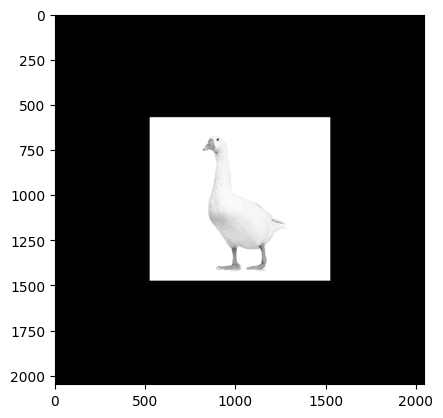

In [44]:
img_path = "C:\Lab\CGH\Images\goose.jpg"
img = Image.open(img_path)
img = img.convert('L')
img = np.array(img)
g = Padding.padding(img, exponent_increment=2, regularization=True)
plt.imshow(g, 'gray')

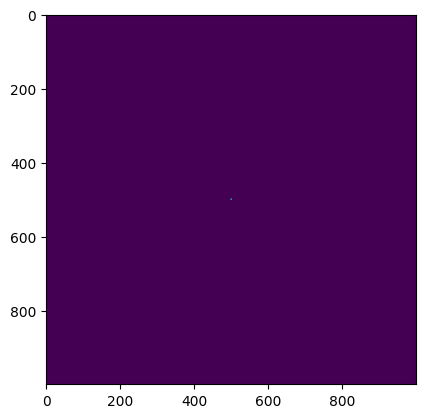

In [68]:
dot = np.zeros((1000,1000))
dot[499:502, 499:502] = 1
plt.imshow(dot)

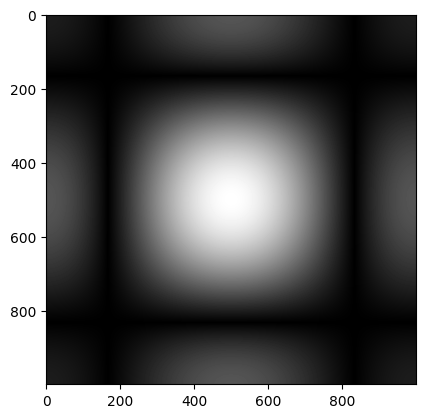

In [69]:
d = Fresnel_propagator.propagate(dot, regularization=True, random_noise=False)
plt.imshow(np.abs(d), 'gray')

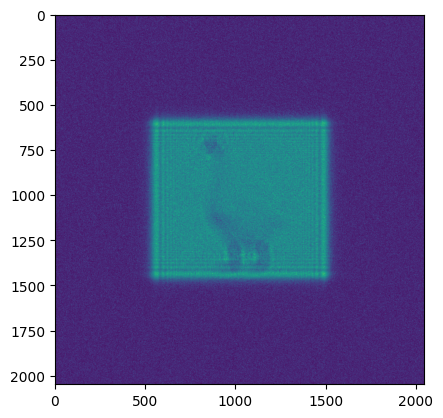

In [45]:
g = Fresnel_propagator.propagate(g, regularization=True, random_noise=True)
plt.imshow(np.abs(g))

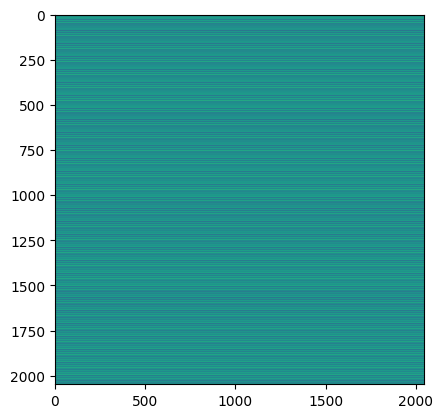

In [49]:
lambda_ = 633e-9
d = 1
H, W = g.shape
dy, dx = np.sqrt(lambda_ * d / H), np.sqrt(lambda_ * d / W)
r = Wave_generator.planewave(g.shape, (dy, dx), theta=np.pi/4)
plt.imshow(np.angle(r))

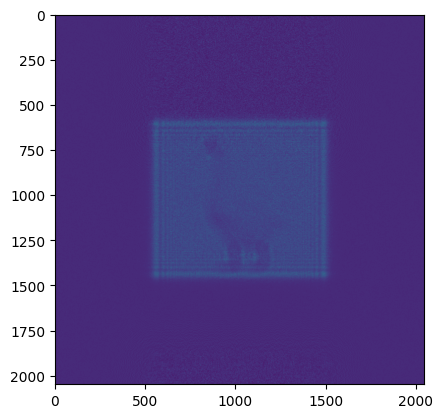

In [50]:
holo = np.square(np.abs(g + r))
plt.imshow(holo)

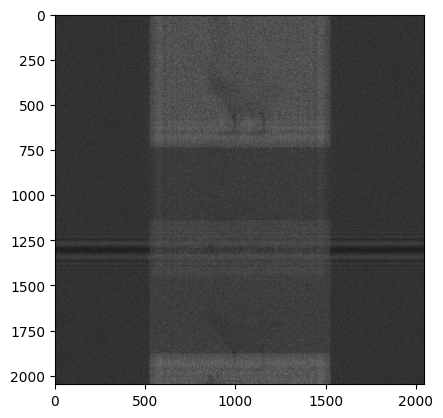

In [55]:
pix = 3.45e-6

p = Wave_generator.planewave((H, W), (pix, pix))
recon = (holo/np.max(holo)) * r
recon = Fresnel_propagator.propagate(recon, step='record', regularization=True, pix=pix, random_noise=True)
plt.imshow(np.abs(recon), 'gray')